In [2]:
%run dfmux_calc.py

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
freqs = np.linspace(1.5e6, 5.5e6, 68)

dfmux = DfMux(freqs,
              bolo = Bolometer(r=1., tc=0.),
              carrier = CarrierChain(t_bias=.0),
              demod = DemodChain(),
              nuller = NullerChain(),
              squid = SQUID(zt = 1500., 
                            rdyn = 400.,
                            lin = 70e-9,
                            noise_squid_only = 1e-12),
             )

dfmux.calc_noise()

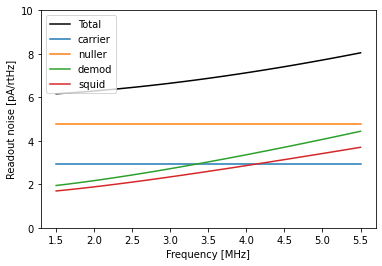

In [5]:
# make plot
plt.plot(freqs/1e6, dfmux.total_noise*1e12, 'k', label='Total')
plt.plot(freqs/1e6, dfmux.carrier.total_noise*1e12, label='carrier')
plt.plot(freqs/1e6, dfmux.nuller.total_noise*1e12, label='nuller')
plt.plot(freqs/1e6, dfmux.demod.total_noise*1e12, label='demod')
plt.plot(freqs/1e6, dfmux.squid.total_noise*1e12, label='squid')
plt.legend()
plt.ylabel('Readout noise [pA/rtHz]')
plt.xlabel('Frequency [MHz]')
plt.ylim(0, 10)
plt.show()

### What happens if we have an awesome SQUID with negligible noise?


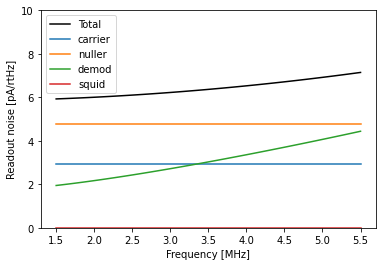

0.925960480586192
Median noise:  6.3658184530801326e-12


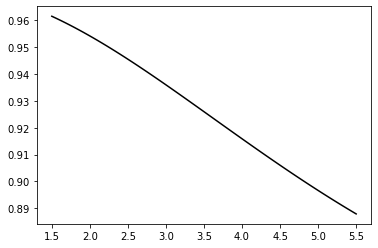

In [9]:
freqs = np.linspace(1.5e6, 5.5e6, 68)

dfmux3 = DfMux(freqs,
              bolo = Bolometer(r=1., tc=0.),
              carrier = CarrierChain(t_bias=.0),
              demod = DemodChain(),
              nuller = NullerChain(),
              squid = SQUID(zt = 1500., 
                            rdyn = 400.,
                            lin = 70e-9,
                            noise_squid_only = 0),
             )

dfmux3.calc_noise()
plt.plot(freqs/1e6, dfmux3.total_noise*1e12, 'k', label='Total')
plt.plot(freqs/1e6, dfmux3.carrier.total_noise*1e12, label='carrier')
plt.plot(freqs/1e6, dfmux3.nuller.total_noise*1e12, label='nuller')
plt.plot(freqs/1e6, dfmux3.demod.total_noise*1e12, label='demod')
plt.plot(freqs/1e6, dfmux3.squid.total_noise*1e12, label='squid')
plt.legend()
plt.ylabel('Readout noise [pA/rtHz]')
plt.xlabel('Frequency [MHz]')
plt.ylim(0, 10)
plt.show()

plt.plot(freqs/1e6, dfmux3.total_noise/dfmux.total_noise, 'k', label='ratio')
print(np.median(dfmux3.total_noise)/np.median(dfmux.total_noise))
print("Median noise: ", np.median(dfmux3.total_noise))

### What happens if we change the stiffening resistor? 


0.9188447508930716


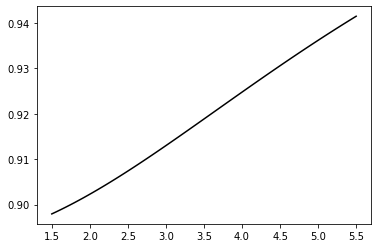

In [7]:
freqs = np.linspace(1.5e6, 5.5e6, 68)

dfmux2 = DfMux(freqs,
              bolo = Bolometer(r=1., tc=0.),
              carrier = CarrierChain(t_bias=.0),
              demod = DemodChain(),
              nuller = NullerChain(r_stiff=3*3e3),
              squid = SQUID(zt = 1500., 
                            rdyn = 400.,
                            lin = 70e-9,
                            noise_squid_only = 1e-12),
             )

dfmux2.calc_noise()

#plt.plot(freqs/1e6, dfmux.total_noise*1e12, 'k', label='Total')
plt.plot(freqs/1e6, dfmux2.total_noise/dfmux.total_noise, 'k', label='ratio')
print(np.median(dfmux2.total_noise)/np.median(dfmux.total_noise))

### All of the options


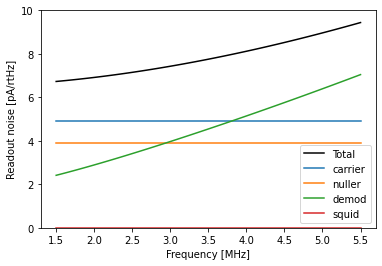

Median noise:  7.754025697883146e-12


In [19]:
freqs = np.linspace(1.5e6, 5.5e6, 68)

Rtes = 0.6 # ohms
r_stiff_nuller =  3*3e3 # ohms
r_stiff_carrier =  3*180 # ohms
noise_squid_only = 0 # 1e-12

dfmux4 = DfMux(freqs,
              bolo = Bolometer(r=Rtes, tc=0.),
              carrier = CarrierChain(t_bias=.0),
              demod = DemodChain(),
              nuller = NullerChain(r_stiff=r_stiff_nuller),
              squid = SQUID(zt = 1500., 
                            rdyn = 400.,
                            lin = 70e-9,
                            noise_squid_only = noise_squid_only),
             )

dfmux4.calc_noise()

plt.plot(freqs/1e6, dfmux4.total_noise*1e12, 'k', label='Total')
plt.plot(freqs/1e6, dfmux4.carrier.total_noise*1e12, label='carrier')
plt.plot(freqs/1e6, dfmux4.nuller.total_noise*1e12, label='nuller')
plt.plot(freqs/1e6, dfmux4.demod.total_noise*1e12, label='demod')
plt.plot(freqs/1e6, dfmux4.squid.total_noise*1e12, label='squid')
plt.legend()
plt.ylabel('Readout noise [pA/rtHz]')
plt.xlabel('Frequency [MHz]')
plt.ylim(0, 10)
plt.show()

#plt.plot(freqs/1e6, dfmux4.total_noise/dfmux.total_noise, 'k', label='ratio')
#print(np.median(dfmux4.total_noise)/np.median(dfmux.total_noise))
print("Median noise: ", np.median(dfmux4.total_noise))